# Lab | Random Forests

For this lab, you will be using the CSV files provided in the `files_for_lab` folder.  These are cleaned versions of the learningSet data from the Case Study 'Healthcare for All'.   
Begin a new Jupyter Notebook after Forking and Cloning this Repo.

### Instructions

- Apply the Random Forests algorithm but this time only by upscaling the data.
- Use Feature Selections that you have learned in class to decide if you want to use all of the features (Variance Threshold, RFE, PCA, etc.)
- Discuss the output and its impact in the bussiness scenario. Is the cost of a false positive equals to the cost of the false negative? How would you change your algorithm or data in order to maximize the return of the business?

In [185]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split



import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.utils import resample

from sklearn.tree import export_text
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier


import matplotlib.pyplot as plt
%matplotlib inline





#### Importing datasets

In [186]:
numerical = pd.read_csv('./files_for_lab/numerical.csv')
categorical = pd.read_csv('./files_for_lab/categorical.csv')
targets = pd.read_csv('./files_for_lab/target.csv')

In [187]:
display(numerical.head(2),numerical.shape)

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.0,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.0,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1


(95412, 315)

In [188]:
display(categorical.head(2),categorical.shape)

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11
1,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10


(95412, 22)

In [189]:
display(targets.head(2),targets.shape)

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0


(95412, 2)

#### Apply the Random Forests algorithm but this time only by upscaling the data

    - Random Forest --> no need to scale or encode

In [190]:
data = pd.concat([numerical, categorical, targets], axis = 1)
data['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [191]:
data.isna().sum().sum()

0

In [192]:
#list(data.isna().sum())

In [193]:
# X-y split
y = data['TARGET_B']
X = data.drop(['TARGET_B'], axis = 1)

# Split features
numericalX = X.select_dtypes(np.number)
categoricalX = X.select_dtypes(np.object)

# Encoding categoricals so we can use the same dataset to perform a regression later (in the lab).
# it is not needed for a DecisionTree or RandomForest model
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(categoricalX)
encoded_categorical = encoder.transform(categoricalX).toarray()
encoded_categorical = pd.DataFrame(encoded_categorical)
X = pd.concat([numericalX, encoded_categorical], axis = 1)

# Note: we need to do train/test split before downsampling, and then only downsample the training set - Why?
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [194]:
# Change to upsampling

# for downsampling we need to temporarily concat X_train and y_train
trainset = pd.concat([X_train, y_train], axis=1)

from sklearn.utils import resample

category_0 = trainset[trainset['TARGET_B'] == 0]
category_1 = trainset[trainset['TARGET_B'] == 1]

category_1_oversampled = resample(category_1,
                                  replace=True,
                                  n_samples = len(category_0))

display("Category 0: ",category_0.shape, "Category_1_oversampled :",category_1_oversampled.shape)

# quicker way to downsample category 0:
# category_0 = trainset[trainset['TARGET_B']==0].sample(len(trainset[trainset['TARGET_B']==1]))
# print(category_0.shape)
# largestgroup0.sample(downsample)1

#category_1 = trainset[trainset['TARGET_B']== 1 ]

# concat rows
trainset_new = pd.concat([category_0, category_1_oversampled], axis = 0)
# trainset ordered (not donnors top, donnors below) --> random order!
trainset_new = trainset_new.sample(frac =1) #randomize the rows
# drop target
X_train = trainset_new.drop(['TARGET_B'], axis=1)
y_train = trainset_new['TARGET_B']
#data = data.reset_index(drop=True)
print("X_train: ",X_train.shape)

'Category 0: '

(72486, 356)

'Category_1_oversampled :'

(72486, 356)

X_train:  (144972, 355)


In [195]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

y_train_regression = X_train['TARGET_D']
y_test_regression = X_test['TARGET_D']

# Now we can remove the column target D from the set of features (to much correlated)
X_train = X_train.drop(['TARGET_D'], axis = 1)
X_test = X_test.drop(['TARGET_D'], axis = 1)

In [196]:
y_test

58053    0
9484     0
13395    0
1466     0
2076     0
        ..
94255    0
26449    0
1969     0
48574    0
73270    0
Name: TARGET_B, Length: 19083, dtype: int64

In [197]:
y_test_regression

58053    0.0
9484     0.0
13395    0.0
1466     0.0
2076     0.0
        ... 
94255    0.0
26449    0.0
1969     0.0
48574    0.0
73270    0.0
Name: TARGET_D, Length: 19083, dtype: float64

In [198]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(max_depth=5, #max number of questions to ask
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.2, # fraction of X-train to use in each tree
                             random_state = 42)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

y_pred = clf.predict(X_test)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

0.6197334657727009
0.6037834722003877


0    18083
1     1000
Name: TARGET_B, dtype: int64

array([[10969,  7114],
       [  447,   553]])

- 0.62 : accuracy on train set
- 0.60 : accuracy on test set


- 0/18083 : not donnor (y_test)
- 1/1000 : donnor (y_test)

- confusion matrix :
    - Predicted:                 Not Donnor    //     Donnor
    - Actual Not Donnor:   10939 True Positive // 7144 False Negative
    - Actual Donnor:        459 False Negative // 541 True Negative


In [199]:
# For cross validation
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20)
                            # max_sample=0.8) --> now use of all data
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
print(np.mean(cross_val_scores)) # output: mean accuracy score (in this case) 


0.6167397780426608


#### Use Feature Selections that you have learned in class to decide if you want to use all of the features (Variance Threshold, RFE, PCA, etc.)

#### Principal Component Analysis (PCA)

In [200]:
from sklearn.decomposition import PCA

In [201]:
# Scaled X_Train X_Test
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [202]:
pca = PCA()
pca.fit(X_train_scaled)

PCA()

        - Explained Variance Ratio

In [203]:
#pca.explained_variance_ratio_.round(2)

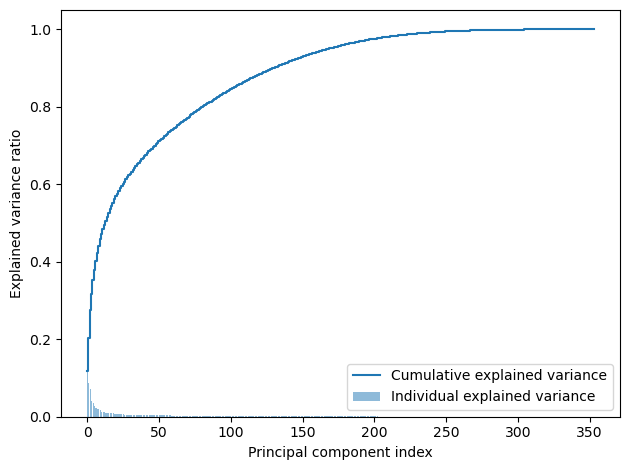

In [204]:
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.

cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#cum_sum_eigenvalues

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, 
        alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, 
         where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [205]:
X_train_scaled.shape
# 354 features on X_train_scaled

(144972, 354)

In [206]:
pca.explained_variance_ratio_[:150].sum()

0.9278665904890063

In [207]:
pca.explained_variance_ratio_[:100].sum()

0.8432767520738752

        - Choose the number of dimensions

In [208]:
pca = PCA(125)
pca.fit(X_train_scaled)

PCA(n_components=125)

In [209]:
pca.explained_variance_ratio_.sum()

0.8892299505370069

        - Apply PCA on train and test data

In [210]:
pca = PCA(0.89)
pca.fit(X_train_scaled)

PCA(n_components=0.89)

In [211]:
#pca.explained_variance_ratio_

In [212]:
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [213]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(max_depth=5, #max number of questions to ask
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.2, # fraction of X-train to use in each tree
                             random_state = 42)
clf.fit(X_train_pca, y_train)
print(clf.score(X_train_pca, y_train))
print(clf.score(X_test_pca, y_test))

y_pred = clf.predict(X_test_pca)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

0.6621554507077229
0.6481161242991144


0    18083
1     1000
Name: TARGET_B, dtype: int64

array([[11887,  6196],
       [  519,   481]])

- 0.66 : accuracy on train set
- 0.64 : accuracy on test set


- 0/18083 : not donnor (y_test)
- 1/1000 : donnor (y_test)

- confusion matrix :
    - Predicted:                   Not Donnor    //     Donnor
    - Actual Not Donnor:     11870 True Positive // 6213 False Negative
    - Actual Donnor:          531 False Negative // 469 True Negative

#### Variance Thresholds Method (works best on scaled data)

In [214]:
# 'Numerical' dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_scaled = scaler.fit_transform(numerical)

In [215]:
#X_train_scaled
#X_test_scaled

In [216]:
pd.DataFrame(numerical_scaled).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314
0,0.000000,0.608247,0.666667,1.000000,0.000000,0.000000,0.393939,0.343434,0.181818,0.101010,0.020202,0.011494,0.555556,0.010051,0.011108,0.009378,0.0,0.353535,0.656566,0.474747,0.535354,0.929293,0.010101,0.0,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.113402,0.0,0.000000,0.000000,0.464286,0.571429,0.607143,0.476190,0.595238,0.642857,0.333333,0.313131,0.424242,0.272727,0.111111,0.141414,0.181818,0.171717,0.131313,0.111111,0.151515,0.121212,0.111111,0.343434,0.252525,0.181818,0.262626,0.101010,0.232323,0.181818,0.333333,0.494949,0.282828,0.121212,0.040404,0.616162,0.070707,0.164384,0.191919,0.304615,0.394286,0.979798,0.959596,0.020202,0.020202,0.000000,0.000000,0.070707,0.070707,0.000000,0.079833,0.105833,0.230769,0.153846,0.868687,0.141414,0.969697,0.040404,0.070707,0.383838,0.808081,0.707071,0.323232,0.848485,0.161616,0.060606,0.04,0.050505,0.090909,0.151515,0.030303,0.226667,0.505051,0.252525,0.000000,0.000000,0.000000,0.020202,0.070707,0.131313,0.272727,0.474747,0.000000,0.010101,0.616162,0.682353,0.677778,0.245902,0.100,0.020202,0.000000,0.000000,0.141414,0.010101,0.000000,0.000000,0.020202,0.050505,0.171717,0.737374,0.000000,0.271889,0.774120,0.204667,0.212000,0.232667,0.252000,0.073818,0.131313,0.232323,0.232323,0.232323,0.151515,0.010101,0.00,0.000000,0.010101,0.040404,0.252525,0.242424,0.262626,0.171717,0.020202,0.00,0.00000,0.020202,0.282828,0.040404,0.515152,0.010101,0.464646,0.545455,0.030303,0.888889,0.080808,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.040404,0.010101,0.131313,0.155556,0.210526,0.020202,0.454545,0.565657,0.646465,0.505051,0.646465,0.444444,0.626263,0.535354,1.000000,0.0,0.000000,0.090909,0.030303,0.080808,0.131313,0.090909,0.000000,0.054545,0.090909,0.030303,0.151515,0.191919,0.050505,0.040404,0.030303,0.0,0.030303,0.414141,0.010101,0.000000,0.070707,0.131313,0.060606,0.050505,0.000000,0.059701,0.090909,0.040404,0.010101,0.030303,0.101010,0.020202,0.010101,0.070707,0.787879,0.020202,0.000000,0.705882,0.161616,0.101010,0.393939,0.212121,0.216216,0.040404,0.030303,0.051546,0.202020,0.100000,0.263889,0.040404,0.000000,0.000000,0.000000,0.181818,0.393939,0.000000,0.343434,0.232323,0.181818,0.161616,0.012048,0.040404,0.000000,0.250000,0.000000,0.000000,0.050505,0.018182,0.000000,0.000000,0.000000,0.000000,0.00,0.074074,0.0,0.030303,0.747475,0.888889,0.080808,0.000000,0.040404,0.969697,0.777778,0.191919,0.419355,0.596154,0.050505,0.141414,0.141414,0.313131,0.545455,0.464646,0.0,0.0,0.909091,0.000000,0.101010,0.000000,0.0,0.000000,0.333333,0.656566,0.404040,1.000000,1.000000,0.285714,0.4,0.101010,0.070707,0.433333,0.366492,0.315789,0.168831,0.023965,0.127119,0.341463,0.005,0.001401,0.010,0.003676,0.006465,0.498045,0.0,1.000000,0.622951
1,0.000014,0.463918,0.833333,1.000000,0.066390,0.000000,0.151515,0.555556,0.111111,0.060606,0.020202,0.011494,1.000000

In [217]:
from sklearn.feature_selection import VarianceThreshold 

# identify columns with same level of values

# How much variance you want in a particular column?
## 0.02 small value that is non 0 (for scaled data between 0-1)
var_threshold = 0.02
# Create a selector and we put threshold as a parameter (tupple of variables)
## if not scaled, possible to provide a value for each column... more work.
sel = VarianceThreshold(threshold=(var_threshold))

# 1) default is threshold = 0 :eliminate all columns that are identical for all rows
# 2) in practice we would scale the columns first, and then apply threshold, or apply 
#    a different threshold for different columns

# This drops the columns that have a variance less than this threshold
sel = sel.fit(numerical_scaled) # train
temp = sel.transform(numerical_scaled) # transform
temp = pd.DataFrame(temp)
print(numerical_scaled.shape)
print(temp.shape)

(95412, 315)
(95412, 79)


    - This selector would pass from 315 columns to 79
    
    - If 0.01 --> 127 columns (eliminate fewer / allow smaller variance)
    - If 0.1 --> 16 columns (loss of lots of columns with low variance, but also a lot of information!)

In [218]:
# To check which columns were removed, you can manipulate the results from the code below. This gives the variance of each feature in order
# of appearance of the dataset.

# List of computed variance for each column:
# sel.variances_


# Result as True and False for the columns that we selected and those which were removed, respectively.
sel.variances_ > var_threshold
sel.get_support() # this method does the same as previous code line
var_list = list(sel.get_support()) # We add in a list --> can zip with column names (next cell)
#var_list

# True: enough variation
# False: not enough variation --> selector: needs to go

In [219]:
# List of column names where FALSE
col_to_drop = [col[0] for col in zip(numerical.columns, var_list) if col[1] == False]
len(col_to_drop)

236

In [220]:
# Getting all info of the columns to be dropped
removed_columns = pd.DataFrame(data=(numerical.columns,sel.variances_,sel.get_support()), index=('column_name','variance','statement')).T
removed_columns.loc[(removed_columns['statement'] == False),:]

,column_name,variance,statement
0,TCODE,0.000175,False
4,HIT,0.001491,False
5,MALEMILI,0.002618,False
6,MALEVET,0.013424,False
9,LOCALGOV,0.001968,False
...,...,...,...
306,MINRAMNT,0.000077,False
307,MAXRAMNT,0.000025,False
308,LASTGIFT,0.000195,False
309,TIMELAG,0.000051,False


In [221]:
# drop columns from the numerical dataset
numerical_vrm = numerical.drop(col_to_drop, axis=1)
numerical_vrm.shape

(95412, 79)

In [222]:
data2 = pd.concat([numerical_vrm, categorical, targets], axis = 1)
data2['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [223]:
# X-y split
y = data2['TARGET_B']
X = data2.drop(['TARGET_B'], axis = 1)

# Split features
numericalX = X.select_dtypes(np.number)
categoricalX = X.select_dtypes(np.object)

# Encoding categoricals so we can use the same dataset to perform a regression later (in the lab).
# it is not needed for a DecisionTree or RandomForest model
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(categoricalX)
encoded_categorical = encoder.transform(categoricalX).toarray()
encoded_categorical = pd.DataFrame(encoded_categorical)
X = pd.concat([numericalX, encoded_categorical], axis = 1)

# Note: we need to do train/test split before downsampling, and then only downsample the training set - Why?
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [224]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

y_train_regression = X_train['TARGET_D']
y_test_regression = X_test['TARGET_D']

# Now we can remove the column target D from the set of features (to much correlated)
X_train_vrm = X_train.drop(['TARGET_D'], axis = 1)
X_test_vrm = X_test.drop(['TARGET_D'], axis = 1)

In [225]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(max_depth=5, #max number of questions to ask
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.2, # fraction of X-train to use in each tree
                             random_state = 42)
clf.fit(X_train_vrm, y_train)
print(clf.score(X_train_vrm, y_train))
print(clf.score(X_test_vrm, y_test))

y_pred = clf.predict(X_test_vrm)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

0.9496521636599458
0.9475973379447676


0    18083
1     1000
Name: TARGET_B, dtype: int64

array([[18083,     0],
       [ 1000,     0]])

#### Recursive Feature Elimination RFE

In [226]:
X = numerical_scaled # Done before in VRM
y = targets['TARGET_D']

from sklearn.feature_selection import RFE
from sklearn import linear_model
lm = linear_model.LinearRegression() # empty
rfe = RFE(lm, n_features_to_select=25, verbose=False)
rfe.fit(X, y)

RFE(estimator=LinearRegression(), n_features_to_select=25, verbose=False)

In [227]:
# Rank of each column (in order in our df) / 25
#rfe.ranking_

In [228]:
# After the algorithm, it labels the top features as 1 and the rest are marked in an increasing order of importance.
df = pd.DataFrame(data = rfe.ranking_, columns=['Rank'])
df['Column_name'] = pd.DataFrame(numerical).columns
df_1=df[df['Rank']==1]
display(df_1, len(df_1))

,Rank,Column_name
16,1,POP90C1
17,1,POP90C2
18,1,POP90C3
25,1,ETH5
33,1,ETH13
34,1,ETH14
35,1,ETH15
36,1,ETH16
76,1,DW3
78,1,DW5


25

In [229]:
col_to_drop = []

for col in df_1['Column_name'].values:
    col_to_drop.append(col)
    
len(col_to_drop)

25

In [230]:
# drop columns from the numerical dataset
numerical_rfe = numerical.drop(col_to_drop, axis=1)
numerical_rfe.shape

(95412, 290)

In [231]:
data3 = pd.concat([numerical_rfe, categorical, targets], axis = 1)
data3['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [232]:
# X-y split
y = data3['TARGET_B']
X = data3.drop(['TARGET_B'], axis = 1)

# Split features
numericalX = X.select_dtypes(np.number)
categoricalX = X.select_dtypes(np.object)

# Encoding categoricals so we can use the same dataset to perform a regression later (in the lab).
# it is not needed for a DecisionTree or RandomForest model
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(categoricalX)
encoded_categorical = encoder.transform(categoricalX).toarray()
encoded_categorical = pd.DataFrame(encoded_categorical)
X = pd.concat([numericalX, encoded_categorical], axis = 1)

# Note: we need to do train/test split before downsampling, and then only downsample the training set - Why?
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [233]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

y_train_regression = X_train['TARGET_D']
y_test_regression = X_test['TARGET_D']

# Now we can remove the column target D from the set of features (to much correlated)
X_train_rfe = X_train.drop(['TARGET_D'], axis = 1)
X_test_rfe = X_test.drop(['TARGET_D'], axis = 1)

In [234]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(max_depth=5, #max number of questions to ask
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.2, # fraction of X-train to use in each tree
                             random_state = 42)
clf.fit(X_train_rfe, y_train)
print(clf.score(X_train_rfe, y_train))
print(clf.score(X_test_rfe, y_test))

y_pred = clf.predict(X_test_rfe)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

0.9496521636599458
0.9475973379447676


0    18083
1     1000
Name: TARGET_B, dtype: int64

array([[18083,     0],
       [ 1000,     0]])

In [235]:
### Gorka: 

In [236]:
from sklearn.feature_selection import VarianceThreshold, RFE
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

In [237]:
X_added_constant = sm.add_constant(X_train)
X_added_constant
model = sm.OLS(y_train,X_added_constant).fit()
model.summary()
26,27,43,99

(26, 27, 43, 99)

In [238]:
# Use variance threshold to remove low-variance features
vt = VarianceThreshold(threshold=0.05)
X_vt = vt.fit_transform(X_train)

# # Use RFE to select the top k features
# rfe = RFE(estimator=rfc, n_features_to_select=5, step=1)
# X_rfe = rfe.fit_transform(X_train_upsampled, y_train_upsampled)

# Use PCA to reduce the dimensionality of the data
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_train)

# Model performance using all features
scores_all_features = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
print('Accuracy using all features:', scores_all_features.mean())

# Model performance using variance threshold
scores_vt = cross_val_score(clf, X_vt, y_train, cv=5, scoring='accuracy')
print('Accuracy using variance threshold:', scores_vt.mean())

# # Model performance using RFE
scores_rfe = cross_val_score(clf, X_train_rfe, y_train, cv=5, scoring='accuracy')
print('Accuracy using RFE:', scores_rfe.mean())

# Model performance using PCA
scores_pca = cross_val_score(clf, X_pca, y_train, cv=5, scoring='accuracy')
print('Accuracy using PCA:', scores_pca.mean())

Accuracy using all features: 0.9496521641403206
Accuracy using variance threshold: 0.9496521641403206
Accuracy using RFE: 0.9496521641403206
Accuracy using PCA: 0.9496521641403206


#### Discuss the output and its impact in the bussiness scenario. Is the cost of a false positive equals to the cost of the false negative? How would you change your algorithm or data in order to maximize the return of the business?

Let's take the example of a credit card fraud detection system. In this scenario, false positives occur when the system flags a legitimate transaction as fraudulent, while false negatives occur when the system fails to flag a fraudulent transaction.


- The cost of a false positive in this scenario could include:


    - Inconvenience to the cardholder if their legitimate transaction is declined or blocked
    - Potential loss of revenue for the merchant if the transaction is cancelled or not completed
    - Cost of investigating the flagged transaction, which could be significant if it involves contacting the cardholder and merchant to verify the transaction.



- The cost of a false negative in this scenario could include:


    - Financial loss to the cardholder if their card is used fraudulently and they are held liable for the charges
    - Reputation damage for the credit card company if their customers' accounts are compromised
    - Potential loss of revenue if cardholders switch to a competitor with a more reliable fraud detection system.

By assessing the costs associated with false positives and false negatives, the credit card company can tune their fraud detection system to optimize the trade-off between these errors, ensuring that the system is effective in detecting fraud while minimizing inconvenience to cardholders and merchants.

## Lab | Final regression model in "Health Care for All" Case

#### Instructions

At this point, we have created a model to predict who will make a donation and who won't (Classification Model). But, what about the ammount of money that each person will give?

In this lab, subset those that have made a donation (Target B) and use that subset to create a model to predict how much money will they give (Target D) (Regression Model).

    - Only look at people who have donated (Target B = 1)
    - Use this new dataframe to predict how much they will donate (Target D)
    - Using the regression model, make predictions on all of the people our classification model predicted will donate.
    - Evaluate the result of your model and estimate how much better the result are for the business in comparison with the naive scenario we discuss on Monday. (Just sending donation cards to everyone)

In [311]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split



import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.utils import resample

from sklearn.tree import export_text
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier


import matplotlib.pyplot as plt
%matplotlib inline

#### Import datasets

In [312]:
numerical = pd.read_csv('./files_for_lab/numerical.csv')
categorical = pd.read_csv('./files_for_lab/categorical.csv')
targets = pd.read_csv('./files_for_lab/target.csv')

###### Numerical dataframe

In [313]:
display(numerical.head(), numerical.shape)

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,60,18,0,1,0,0,1,6,18,50,0,4,36,49,51,14,5,4,2,24,11,2,3,6,0,2,9,44,0.0,281.0,518.0,251,292,292,340,11576,32,18,20,15,12,2,0,0,1,20,19,24,18,16,2,0,0,1,28,8,31,11,38,62,8,74,22,0,0,0,0,0,2,2,1,21,19,24,6,61,65,73,59,70,56,78,62,82,99,4,10,5,2,6,12,0,1,9,5,18,20,5,7,6,0,11,33,4,3,2,12,3,3

(95412, 315)

In [314]:
numerical.isna().sum().sum()

0

###### Categorical dataframe

In [315]:
display(categorical.head(), categorical.shape)

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11
1,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10
2,NC,43,U,M,3,L,E,C,R,2,90,1,0,2,91,11,92,7,95,12,90,1
3,CA,44,U,F,3,L,E,C,R,2,87,1,28,1,87,11,94,11,95,12,87,2
4,FL,16,H,F,3,L,F,A,S,2,86,1,20,1,93,10,96,1,96,1,79,3


(95412, 22)

In [316]:
# Looking for null values
categorical.isna().sum().sum()

0

In [317]:
# Checking unique values
unique_values = categorical.apply(pd.Series.nunique).sort_values(ascending=False)
unique_values

DOB_YR          96
CLUSTER         53
FIRSTDATE_YR    26
MINRDATE_YR     20
MAXRDATE_YR     18
ODATEW_YR       15
STATE           12
LASTDATE_MM     12
MAXRDATE_MM     12
MINRDATE_MM     12
DOB_MM          12
ODATEW_MM       12
FIRSTDATE_MM    12
DOMAIN_A         5
DOMAIN_B         4
GEOCODE2         4
RFA_2A           4
DATASRCE         3
LASTDATE_YR      3
GENDER           3
HOMEOWNR         2
RFA_2R           1
dtype: int64

In [318]:
# Last two digits of year of birth
categorical['DOB_YR'].unique()

array([37, 52,  0, 28, 20, 60, 32, 23, 26, 27, 54, 36, 16, 43, 56, 14, 48,
       29, 10, 13, 68, 53, 46, 31, 90, 30, 58, 50, 64, 18, 62, 57, 44, 25,
       51, 65, 35, 34, 38, 21, 24, 11, 47, 80, 39, 12, 72, 22, 40, 59, 15,
       17, 42, 19, 61, 41, 49, 33, 45, 63, 81, 55, 67, 69, 70, 66, 76, 91,
       74, 71, 78,  1, 79, 73, 75,  2, 84, 82, 77, 87, 95, 96, 88, 97, 86,
        8,  6,  4, 92,  5, 93,  7, 89,  9, 85, 83])

In [319]:
# Socio-echonomic groups
categorical['CLUSTER'].unique()

array([36, 14, 43, 44, 16, 40, 39, 45, 35, 53, 17, 51,  2, 20, 27, 12, 22,
       13,  8, 25, 15, 42, 11, 28, 18, 24, 34,  5, 31, 32, 46,  3, 50,  7,
       37, 10, 38, 21,  9, 29, 30,  4, 41, 49, 23, 33,  1, 47, 26, 48, 19,
        6, 52])

In [320]:
# Dropping columns with too many unique values
categorical = categorical.drop(['DOB_YR', 'CLUSTER'], axis = 1)
categorical.shape

(95412, 20)

In [321]:
# Concatenating the 3 dataframes
data = pd.concat([numerical, categorical, targets], axis = 1)
display(data.head(), data.shape)

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39,IL,H,F,3,L,E,C,T,2,89,1,12,92,8,94,2,95,12,89,11,0,0.0
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1,CA,H,M,3,L,G,A,S,1,94,1,2,93,10,95,12,95,12,93,10,0,0.0
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7

(95412, 337)

# TARGET B = DONNOR (1)

In [322]:
# New subset dataframe where all people have donated
data_b = data[data['TARGET_B'] == 1]
data_b

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D
20,2,62.000000,3,8,10,2,25,40,27,11,4,1,9,2707,672,929,99,0,0,45,55,97,1,0,2,1,0,0,0,0,1,0,0,1,0,0,0,35,42,43,37,47,50,27,34,43,23,9,20,27,16,8,6,15,15,13,37,21,14,16,8,15,23,30,47,29,11,2,55,10,13,22,190,267,89,49,1,10,10,8,8,8,0,902,960,8,8,88,12,97,3,11,42,72,60,34,79,21,8,1,7,12,21,5,21,58,17,0,1,0,0,4,35,74,99,0,1,64,63,62,14,4,2,8,0,5,1,7,0,95,96,96,96,5120.0,107.0,613.0,468,501,540,580,20328,6,8,19,23,23,11,7,1,2,4,6,13,27,25,14,8,1,1,14,2,66,1,61,39,20,74,17,2,2,0,0,0,2,4,1,75,20,21,1,67,71,82,62,80,60,80,65,99,0,1,21,20,8,11,17,1,1,10,0,5,3,2,1,0,0,3,23,5,2,4,12,7,3,2,1,14,12,7,5,11,4,1,4,70,10,0,140,5,3,24,21,9,32,7,3,23,3,16,7,1,2,0,12,25,3,40,20,27,7,0,0,2,12,0,0,3,1,4,1,0,0,0,4,0,1,58,95,1,0,4,95,69,23,4,13,2,17,35,91,99,1,12,3,93,0,5,1,0,1,99,1,97,99,99,9,2,6,3,26,65,5,12,61.00,15,10,2.00,7.0,5.0,12,4.066667,82943,1,3,3,other,H,F,3,L,D,A,S,1,87,1,1,88,1,94,4,96,3,87,1,1,4.0
30,0,61.611649,5,9,0,1,37,58,16,8,1,5,9,2147,591,640,99,0,0,49,51,94,2,0,3,5,1,0,1,1,0,0,0,3,0,0,2,29,36,37,27,38,40,37,46,37,17,8,34,34,15,6,2,1,18,21,31,19,11,5,0,3,7,23,71,47,15,6,77,5,1,17,286,334,99,99,0,0,0,0,0,0,0,1002,1166,7,5,97,3,96,4,3,63,92,88,59,97,3,4,1,3,5,4,1,30,60,4,1,2,0,4,15,50,94,99,2,0,91,70,72,20,4,0,0,0,3,0,0,0,78,83,99,99,2920.0,201.0,618.0,633,638,652,663,19703,2,5,1,17,48,19,7,0,1,3,4,0,16,51,19,7,0,1,5,0,65,3,74,26,25,89,9,0,0,0,0,0,1,2,1,82,34,42,22,70,82,98,67,97,66,68,61,99,99,0,34,23,4,10,12,0,2,9,0,4,1,1,0,0,4,2,25,5,2,4,8,8,8,0,3,10,8,9,4,8,1,5,5,76,4,1,160,0,1,12,25,10,39,13,5,33,6,25,7,1,1,0,19,37,2,58,11,16,10,0,4,1,15,0,0,3,2,0,2,0,0,0,1,0,3,48,97,1,1,1,99,91,24,3,6,6,57,85,95,95,5,0,0,75,0,20,0,0,5,96,4,90,99,99,12,4,1,6,10,24,0,2,68.00,11,6,2.00,10.0,7.0,9,6.181818,190313,1,3,14,TX,H,M,3,L,D,A,T,1,90,1,2,90,4,93,1,95,12,90,4,1,7.0
45,0,66.000000,5,9,5,0,33,24,39,6,5,1,9,2160,683,900,89,0,11,48,52,99,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,42,47,49,40,48,50,20,33,42,25,7,14,23,21,17,13,5,14,13,33,22,18,24,7,22,22,43,35,19,6,1,72,7,5,16,165,240,69,58,1,28,27,4,0,0,0,1282,1399,5,4,96,4,97,3,8,27,76,71,25,89,1

In [323]:
# X-y split
y = data_b['TARGET_D']
X = data_b.drop(['TARGET_D', 'TARGET_B'], axis = 1)

In [324]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

In [325]:
# Categorical-Numerical Split
num_cols = X.select_dtypes(np.number).columns.tolist()
cat_cols = X.select_dtypes(object).columns.tolist()

X_train_num = X_train[num_cols]
X_train_cat = X_train[cat_cols]

X_test_num = X_test[num_cols]
X_test_cat = X_test[cat_cols]

In [326]:
# Scaling numerical
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [327]:
# Encoding categorical
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(drop='first')
X_train_cat_encoded = enc.fit_transform(X_train_cat).toarray()
X_test_cat_encoded = enc.transform(X_test_cat).toarray()


In [328]:
# Concatenating again Train columns and Test columns
X_train = pd.concat([pd.DataFrame(X_train_num_scaled, columns=X_train_num.columns), pd.DataFrame(X_train_cat_encoded)], axis=1)
X_test = pd.concat([pd.DataFrame(X_test_num_scaled, columns=X_test_num.columns), pd.DataFrame(X_test_cat_encoded)], axis=1)

In [329]:
# Fit our model like yesterday
from sklearn import linear_model

lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [330]:
from sklearn.metrics import r2_score

predictions = lm.predict(X_train)
predictions[:5]
r2_score(y_train, predictions)

0.6042429942955139

In [331]:
predictions_test = lm.predict(X_test)
predictions_test[:5]
r2_score(y_test, predictions_test)

0.3699073379404506

In [332]:
# Finally we can compare the Y_Test against Predictions_test.
display("y_test results", y_test[:10] )
display ("predictions_test results", predictions_test[:10])

'y_test results'

67242     7.0
671      20.0
25050    25.0
64029    13.0
27162    20.0
56374     9.0
49955    10.0
63874    15.0
70723    20.0
34447    10.0
Name: TARGET_D, dtype: float64

'predictions_test results'

array([ 6.66912676, 15.17203871, 29.75568815,  7.60910031,  9.65519508,
       11.09578608, 17.69857304, 13.78137846, 25.116071  , 11.51204143])

# PCA

In [333]:
from sklearn.decomposition import PCA

pca = PCA(n_components=90)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [334]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
lm.fit(X_train_pca, y_train)

LinearRegression()

In [335]:
from sklearn.metrics import r2_score

predictions = lm.predict(X_train_pca)
r2_score(y_train, predictions)

0.4125550130205996

# RandomForestRegressor

In [352]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

clf = RandomForestRegressor(n_estimators=120, # number of trees
                             max_depth=5, # maximum depth of the trees
                             max_samples=0.2, # fraction of X-train to use in each tree
                             random_state = 42)
clf.fit(X_train, y_train)

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print(f"Training score: {train_score:.2f}")
print(f"Test score: {test_score:.2f}")

y_pred = clf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse:.2f}")


Training score: 0.05
Test score: -0.01
Mean squared error: 20.71


These scores suggest that the model is performing moderately well on the training data, but not as well on the test data. The R^2 score of 0.52 on the training set indicates that the model is explaining about 52% of the variance in the target variable, which is not bad but could be improved.

The lower R^2 score of 0.25 on the test set suggests that the model is not generalizing well to new data, which is a common issue in machine learning. The mean squared error of 123.96 is relatively high, indicating that the model's predictions are off by quite a bit on average.

Overall, these results suggest that the KNeighborsRegressor model may not be the best choice for this particular dataset, and that other models should be explored.

# Kneigbhors

In [355]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)
print(f"Training score: {train_score:.2f}")
print(f"Test score: {test_score:.2f}")

y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse:.2f}")


Training score: 0.21
Test score: -0.17
Mean squared error: 24.03


# RFE

recursive feature elimination (RFE) to find the optimal number of features to keep.

RFE works by recursively removing features and building a model on the remaining features until a desired number of features is reached. It uses the accuracy of the model to identify which features (or combination of features) contribute the most to predicting the target variable.

In [341]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_scaled = scaler.fit_transform(numerical)

In [342]:
X = numerical_scaled
y = targets['TARGET_D']

from sklearn.feature_selection import RFE
from sklearn import linear_model
lm = linear_model.LinearRegression() # empty
rfe = RFE(lm, n_features_to_select=110, verbose=False)
rfe.fit(X, y)

RFE(estimator=LinearRegression(), n_features_to_select=110, verbose=False)

In [343]:
# After we run the algorithm, it labels the top features as 1 and the rest are marked in an increasing order of importance.
df = pd.DataFrame(data = rfe.ranking_, columns=['Rank'])
df['Column_name'] = pd.DataFrame(numerical).columns
df[df['Rank']==1]

,Rank,Column_name
13,1,POP901
15,1,POP903
16,1,POP90C1
17,1,POP90C2
18,1,POP90C3
...,...,...
304,1,NGIFTALL
306,1,MINRAMNT
307,1,MAXRAMNT
308,1,LASTGIFT


In [344]:
X_selected = X[:, rfe.support_]

In [345]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [346]:
from sklearn.linear_model import LinearRegression

lm_selected = LinearRegression()
lm_selected.fit(X_train, y_train)
y_pred = lm_selected.predict(X_test)

In [347]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: ", mse)
print("R-squared score: ", r2)

Mean squared error:  20.54174202317292
R-squared score:  0.003040798222711971


In [ ]:
# Variance Threshold

In [ ]:
from sklearn.feature_selection import VarianceThreshold
import numpy as np

# Combine the scaled numerical features from the training and test sets
X_combined_scaled = np.vstack((X_train_num_scaled, X_test_num_scaled))

# Create a VarianceThreshold object with a threshold of 0.1
selector = VarianceThreshold(threshold=0.1)

# Fit the selector to the combined data and transform the data
X_combined_selected = selector.fit_transform(X_combined_scaled)

# Split the combined data back into training and test sets
X_train_selected = X_combined_selected[:len(X_train_num_scaled)]
X_test_selected = X_combined_selected[len(X_train_num_scaled):]

# Print the number of selected features
print("Number of selected features:", X_train_selected.shape[1])


In [ ]:
X_train_selected.shape

In [ ]:
X_test_selected.shape

In [ ]:
# Create a new linear regression model using the selected features
lm_selected = LinearRegression()
lm_selected.fit(X_train_selected, y_train)

# Make predictions using the new model
y_pred_selected = lm_selected.predict(X_test_selected)

# Calculate the R-squared value of the new model
r2_selected = lm_selected.score(X_test_selected, y_test)
print("R-squared score (selected features):", r2_selected)

# Calculate the mean squared error of the new model
mse_selected = mean_squared_error(y_test, y_pred_selected)
print("Mean squared error (selected features):", mse_selected)

In [ ]:
from sklearn.feature_selection import VarianceThreshold 

# identify columns with same level of values

# How much variance you want in a particular column?
## 0.02 small value that is non 0 (for scaled data between 0-1)
var_threshold = 0.02
# Create a selector and we put threshold as a parameter (tupple of variables)
## if not scaled, possible to provide a value for each column... more work.
sel = VarianceThreshold(threshold=(var_threshold))

# 1) default is threshold = 0 :eliminate all columns that are identical for all rows
# 2) in practice we would scale the columns first, and then apply threshold, or apply 
#    a different threshold for different columns

# This drops the columns that have a variance less than this threshold
sel = sel.fit(numerical_scaled) # train
temp = sel.transform(numerical_scaled) # transform
temp = pd.DataFrame(temp)
print(numerical_scaled.shape)
print(temp.shape)

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Create a VarianceThreshold object with a threshold of 0.1
selector = VarianceThreshold(threshold=0.1)

# Fit the selector to the training data and transform the data
X_train_selected = selector.fit_transform(X_train)

# Print the number of selected features
print("Number of selected features:", X_train_selected.shape[1])

# Transform the test data using the same selector
X_test_selected = selector.transform(X_test)